## Импортирвоание зависимостей

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

C:\Users\damir\AppData\Local\Temp\ipykernel_15608\3901000916.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Конфигурация графиков

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['font.size'] = 14

## Загрузка и просмотр датасета 

In [3]:
path: str = r'data.csv'
data = pd.read_csv(path, index_col='Customer ID')

In [4]:
data.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
Customer ID,,,,,,,,,,
101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 101 to 450
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    350 non-null    object 
 1   Age                       350 non-null    int64  
 2   City                      350 non-null    object 
 3   Membership Type           350 non-null    object 
 4   Total Spend               350 non-null    float64
 5   Items Purchased           350 non-null    int64  
 6   Average Rating            350 non-null    float64
 7   Discount Applied          350 non-null    bool   
 8   Days Since Last Purchase  350 non-null    int64  
 9   Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 27.7+ KB


In [6]:
data.describe()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,33.597143,845.381714,12.600000,4.019143,26.588571
std,4.870882,362.058695,4.155984,0.580539,13.440813
min,26.000000,410.800000,7.000000,3.000000,9.000000
25%,30.000000,502.000000,9.000000,3.500000,15.000000
50%,32.500000,775.200000,12.000000,4.100000,23.000000
75%,37.000000,1160.600000,15.000000,4.500000,38.000000
max,43.000000,1520.100000,21.000000,4.900000,63.000000


In [7]:
data.isna().any(axis=0)

Gender                      False
Age                         False
City                        False
Membership Type             False
Total Spend                 False
Items Purchased             False
Average Rating              False
Discount Applied            False
Days Since Last Purchase    False
Satisfaction Level           True
dtype: bool

In [8]:
data = data[~data['Satisfaction Level'].isna()]

## Пункт №2

In [9]:
cond = data.Gender == 'Male'
male = data[cond]
female = data[~cond]

In [10]:
male.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
Customer ID,,,,,,,,,,
102,Male,34,Los Angeles,Silver,780.5,11,4.1,False,18,Neutral
104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,Satisfied
105,Male,27,Miami,Silver,720.4,13,4.0,True,55,Unsatisfied
108,Male,35,Los Angeles,Silver,800.9,12,4.2,False,14,Neutral
110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,Satisfied


In [11]:
female.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
Customer ID,,,,,,,,,,
101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral
107,Female,31,New York,Gold,1150.60,15,4.5,True,28,Satisfied
109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied


In [12]:
def plot(male: pd.DataFrame, female: pd.DataFrame, feature: str) -> None:
    sns.kdeplot(male[feature], fill=True, label='Male')
    sns.kdeplot(female[feature], fill=True, label='Female')
    plt.title(feature)
    plt.legend()
    plt.show()

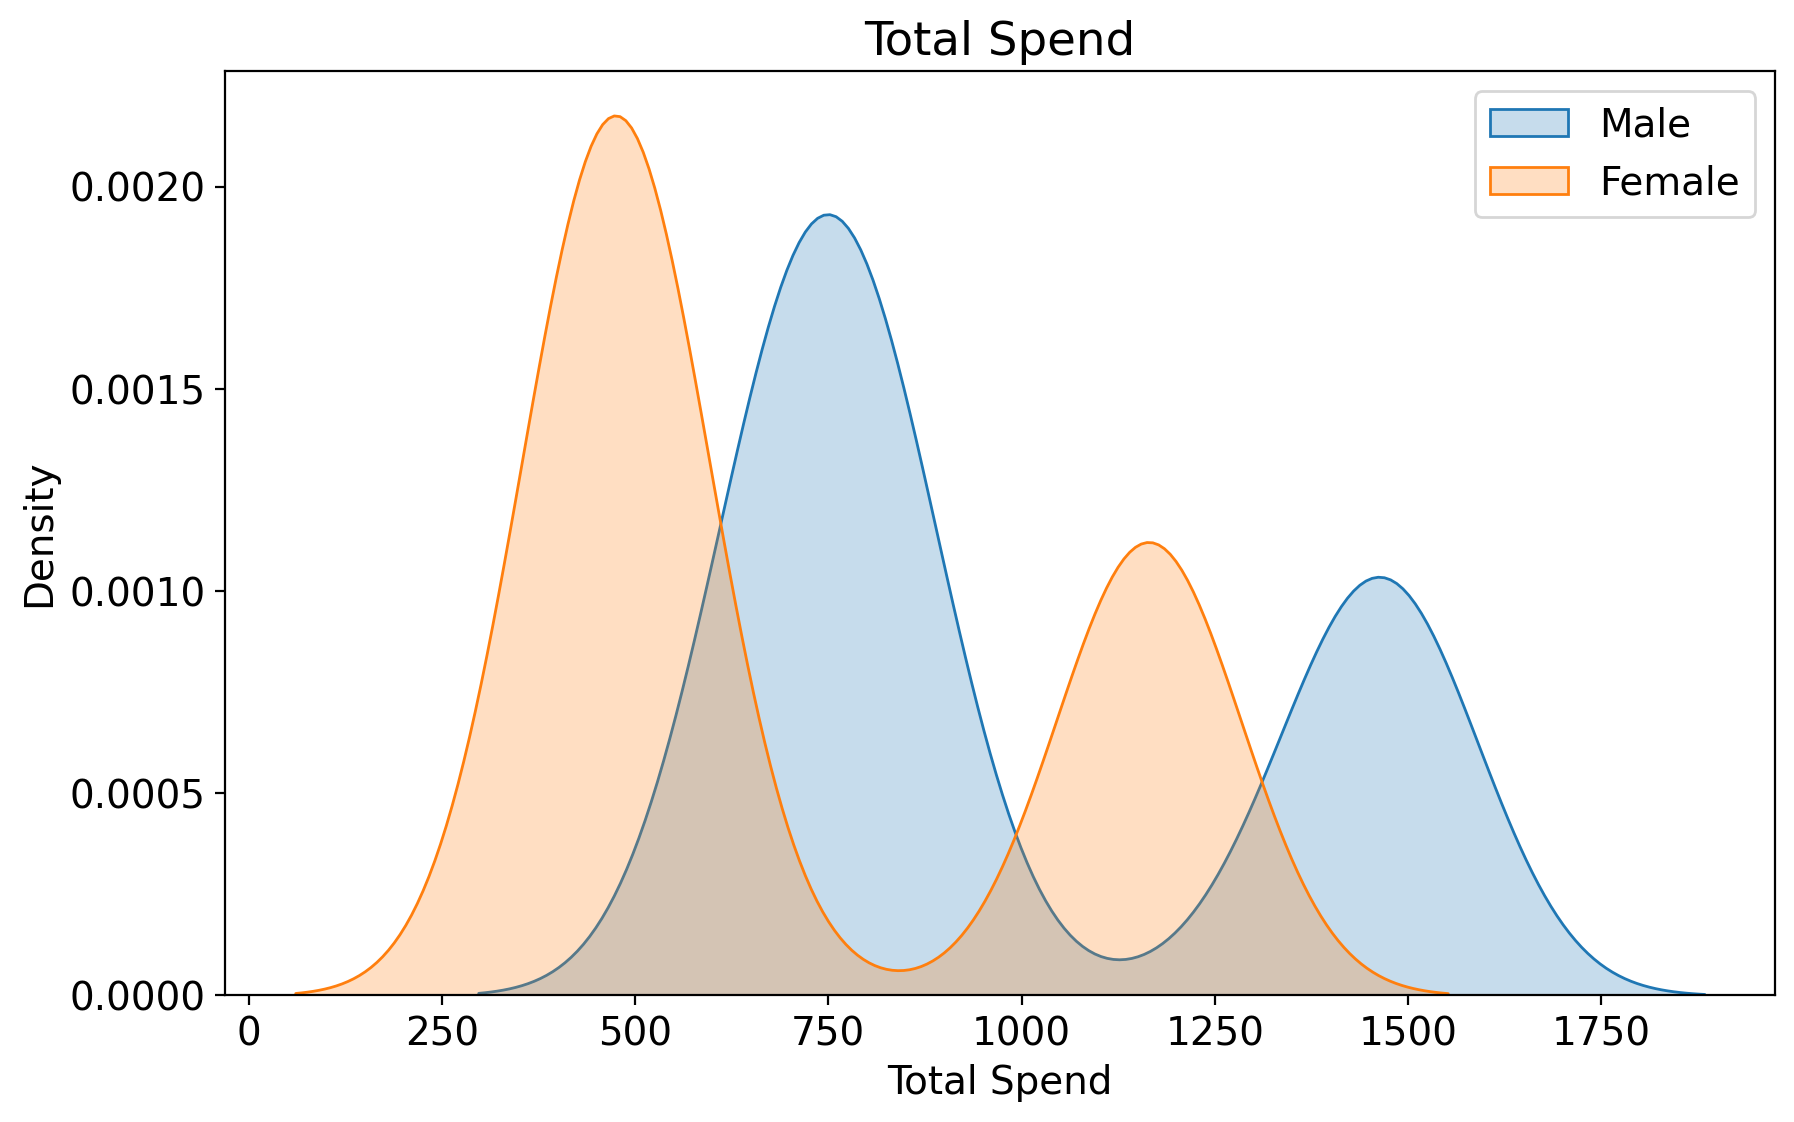

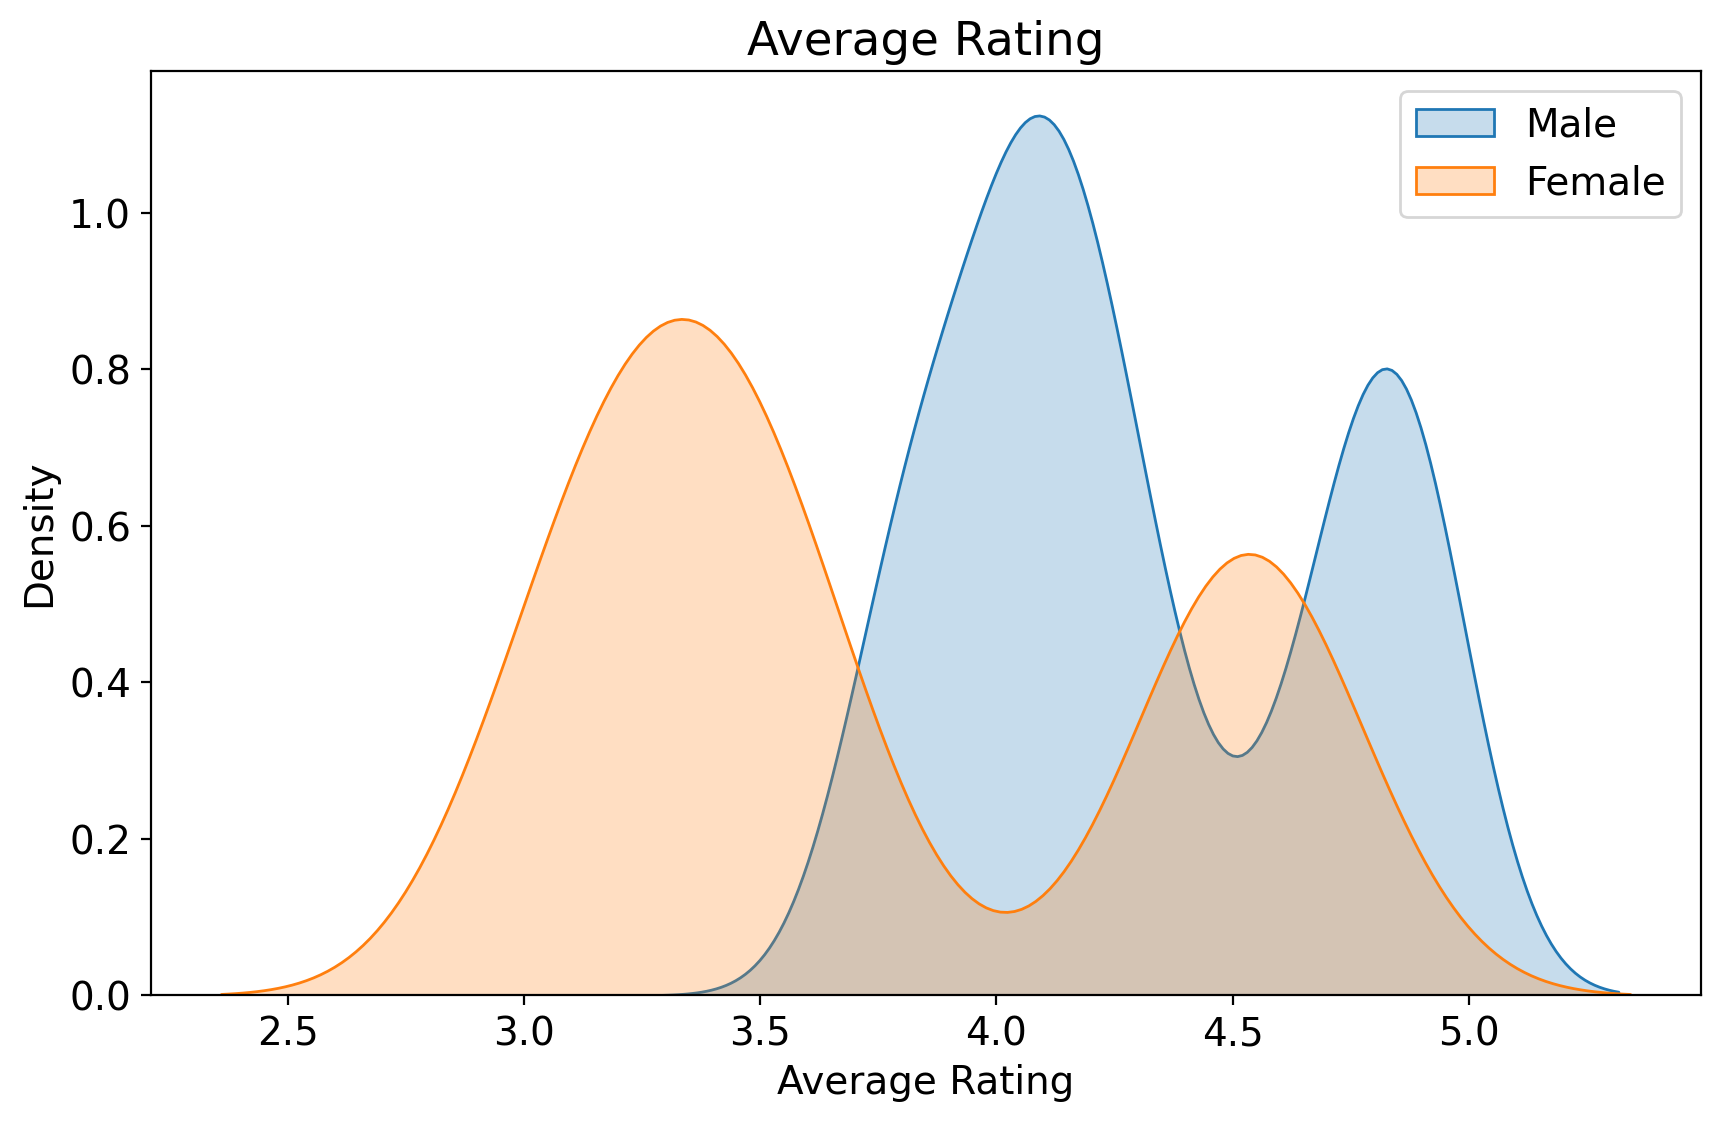

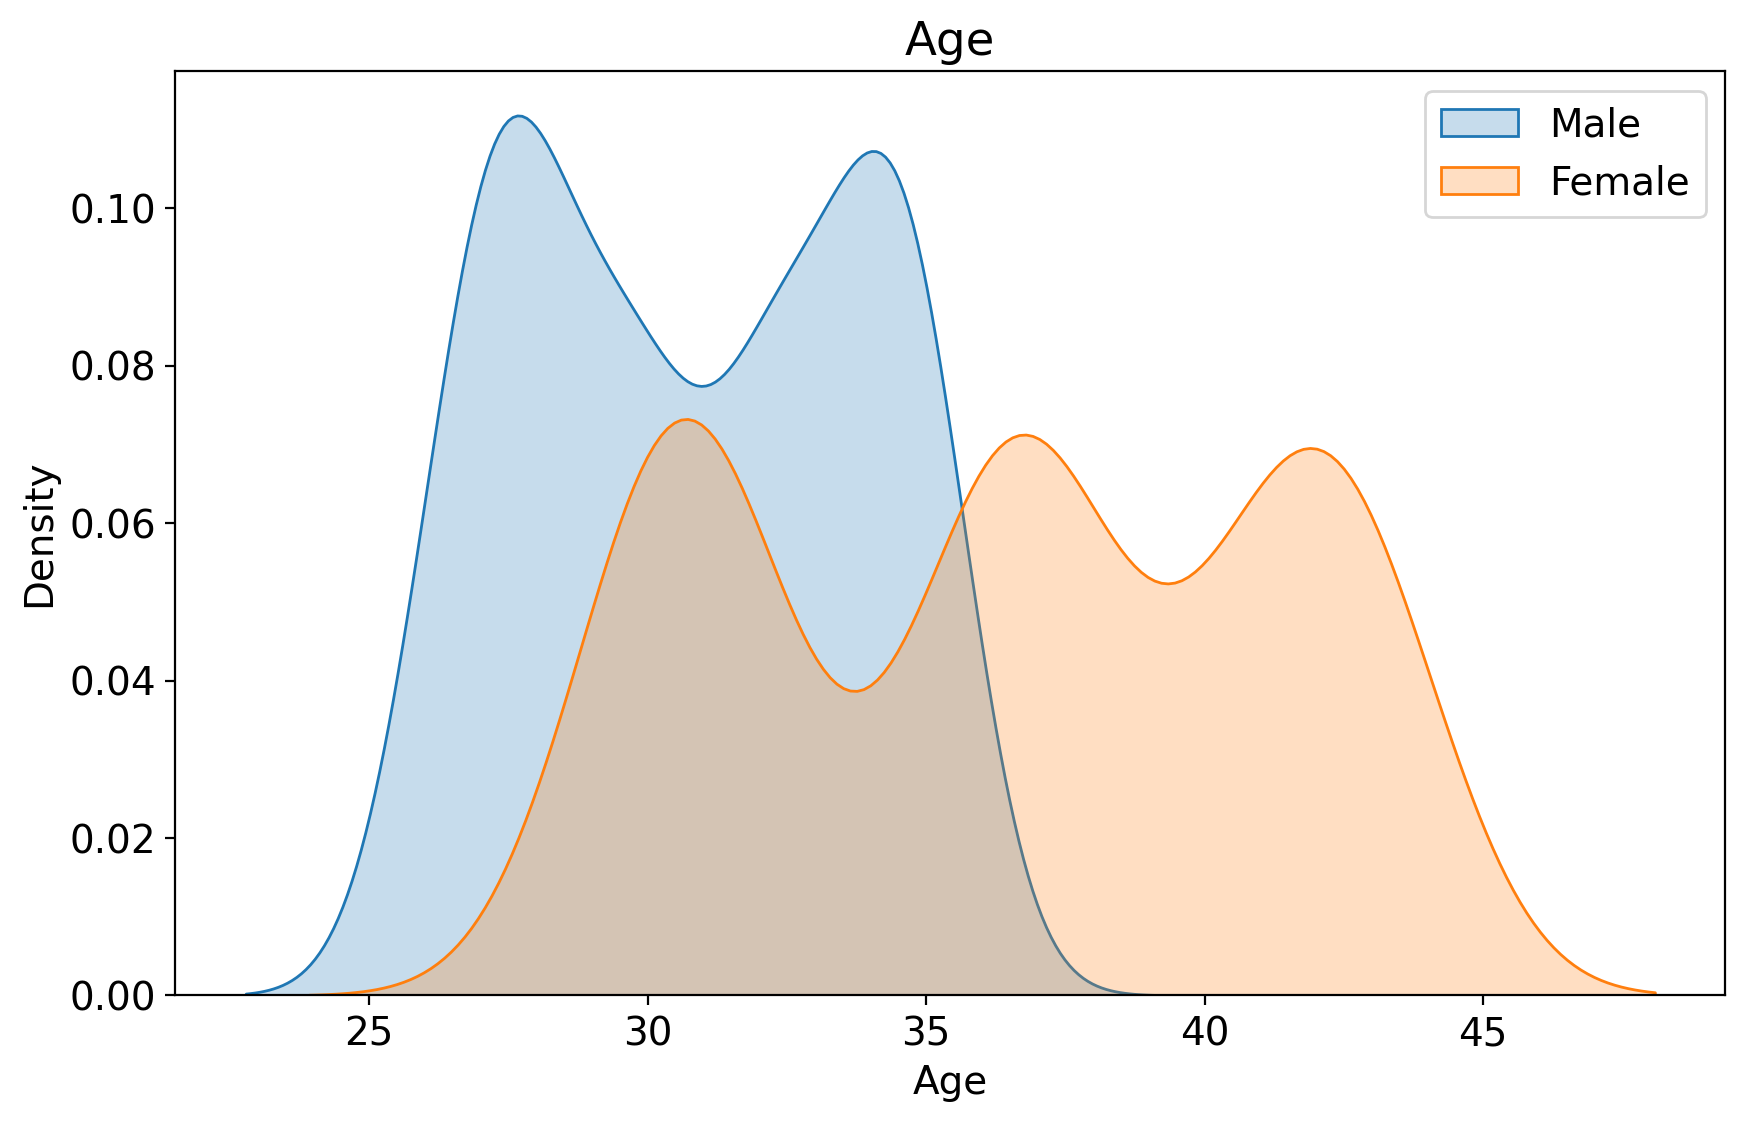

In [13]:
features = ['Total Spend', 'Average Rating', 'Age']
for feature in features:
    plot(male, female, feature)

### Распределения ни на одном из графиков не являются нормальными, поэтому для проверки гипотез воспользуемся тестом Манна-Уитни

In [14]:
def whitney(male: pd.DataFrame, female: pd.DataFrame, feature: str) -> None:
    _, p_value = sts.mannwhitneyu(male[feature], female[feature])
    print(f"В признаке {feature}", end=' ')
    a = .05
    if p_value < a:
        print("есть статистически значимые различия в признике.")
    else:
        print("нет статистически значимые различия в признике.")

In [15]:
for feature in features:
    whitney(male, female, feature)

В признаке Total Spend есть статистически значимые различия в признике.
В признаке Average Rating есть статистически значимые различия в признике.
В признаке Age есть статистически значимые различия в признике.


## Пункт №3

In [16]:
data.City.unique()

array(['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Miami',
       'Houston'], dtype=object)

In [17]:
ny = data[data['City'] == 'New York']
la = data[data['City'] == 'Los Angeles']
chi = data[data['City'] == 'Chicago']
sf = data[data['City'] == 'San Francisco']


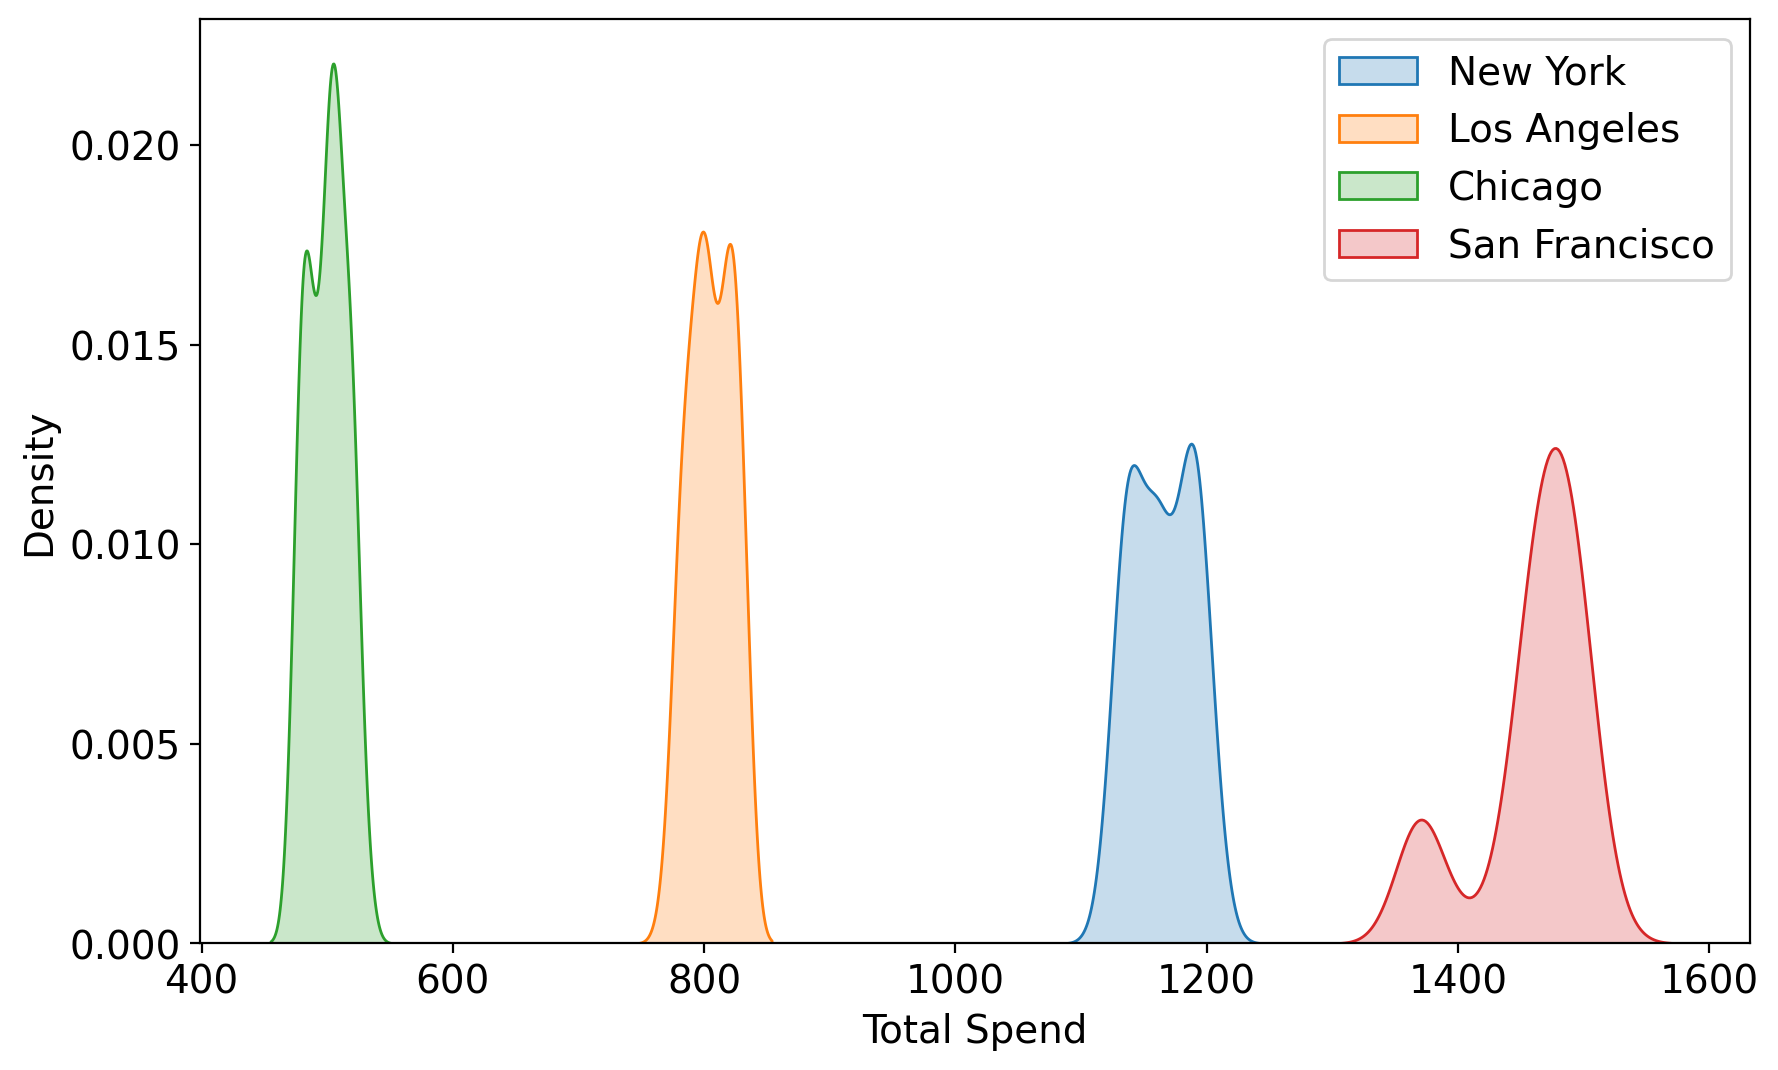

In [18]:
sns.kdeplot(ny['Total Spend'], fill=True, label='New York')
sns.kdeplot(la['Total Spend'], fill=True, label='Los Angeles')
sns.kdeplot(chi['Total Spend'], fill=True, label='Chicago')
sns.kdeplot(sf['Total Spend'], fill=True, label='San Francisco')
plt.legend()
plt.show()

### Сравним Chicago vs New York, Los Angeles, San Francisco

In [19]:
cities = {
    'New York': ny, 
    'Los Angeles': la, 
    'San Francisco': sf
}

In [20]:
print('Тест Стьюдента')
for city_name, city_data in cities.items():
    stats, p_value = sts.ttest_ind(city_data['Total Spend'], chi['Total Spend'])
    print(f'Chicago vs {city_name} {p_value=}')

print()
print('Тест Фишера')
cities_spend = [chi['Total Spend'], ny['Total Spend'], la['Total Spend'], sf['Total Spend']]
stats, p_value = sts.f_oneway(*cities_spend)
print(f'{p_value=}')

Тест Стьюдента
Chicago vs New York p_value=1.7371520098663886e-141
Chicago vs Los Angeles p_value=2.0034280119564863e-114
Chicago vs San Francisco p_value=7.930321791577217e-137

Тест Фишера
p_value=5.6770124960576554e-260


## Пункт №4

In [21]:
def intervals(male: pd.DataFrame, feature: str) -> None:
    print(feature)
    data = np.arange(1, 6)
    conf = .95
    mean = male[feature].mean()
    std = np.std(data, ddof=1)
    diff = sts.t.pdf((1 + conf) / 2, 4) * (std / np.sqrt(5))
    left = mean + diff
    right = mean - diff
    print(f'Точный доверительный интервал для среднего: {left, right}')
    
    means = np.array([])
    for _ in range(int(1e4)):
        value = np.random.choice(male[feature], size=len(male[feature]), replace=True)
        means = np.append(means, value)
    left, right = np.percentile(means, q=[2.5, 97.5])
    print(f'Эфронов доверительный интервал для среднего: {left, right}')

    sns.histplot(means)
    plt.title(feature)
    plt.show()

Total Spend
Точный доверительный интервал для среднего: (987.0904595000055, 986.7792547857085)
Эфронов доверительный интервал для среднего: (660.3, 1500.1)


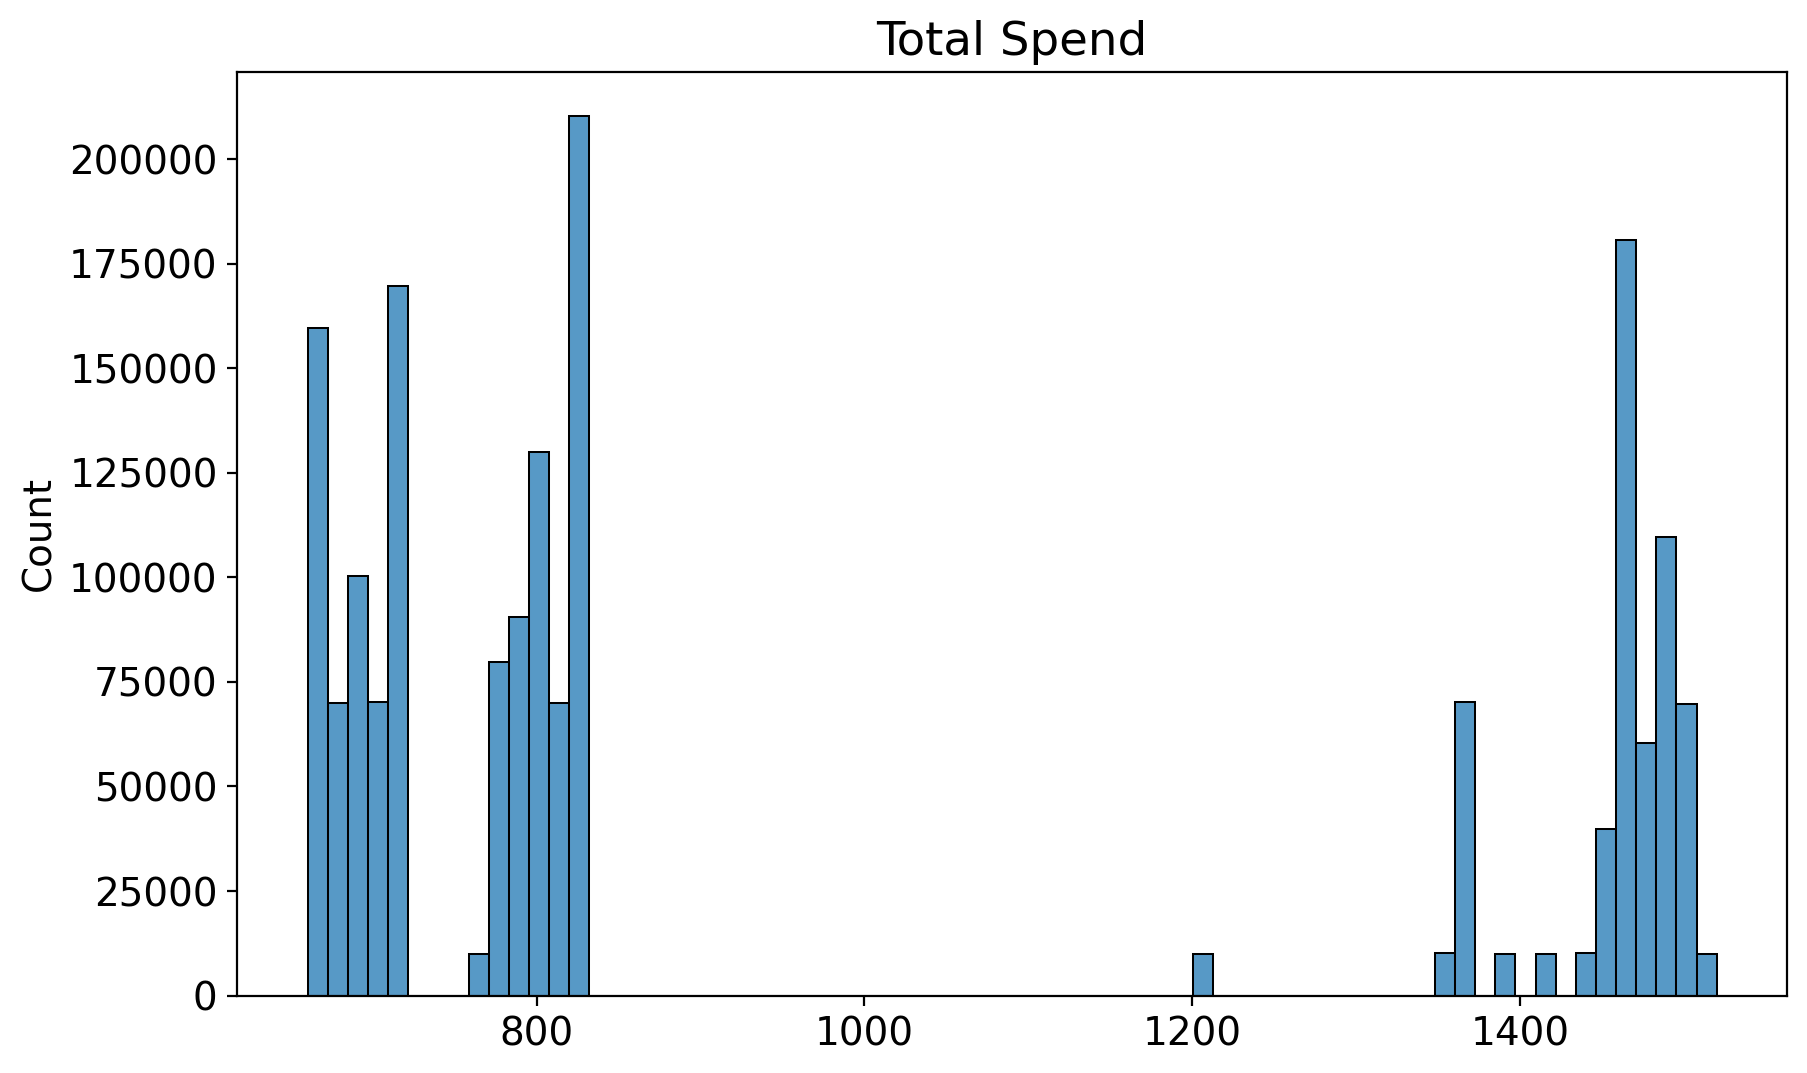

Average Rating
Точный доверительный интервал для среднего: (4.462459500005692, 4.151254785708594)
Эфронов доверительный интервал для среднего: (3.8, 4.9)


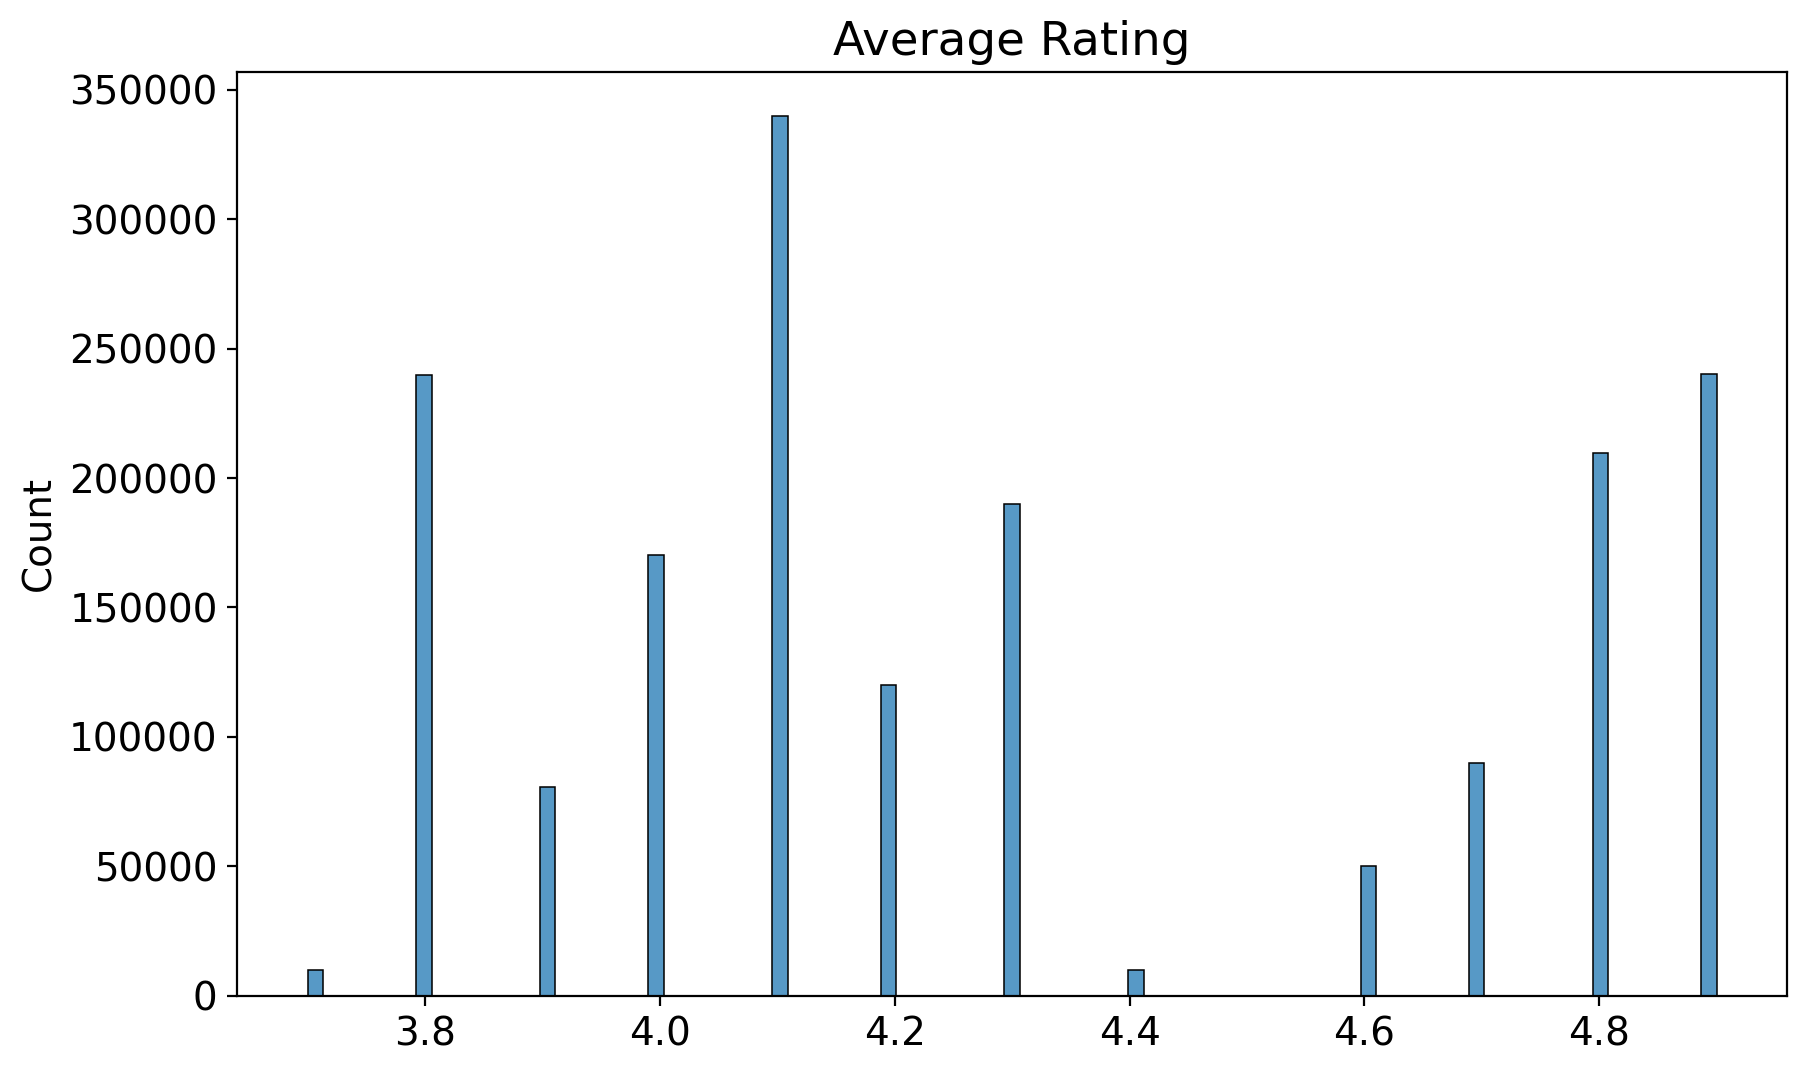

Age
Точный доверительный интервал для среднего: (30.91560235714855, 30.604397642851453)
Эфронов доверительный интервал для среднего: (26.0, 35.0)


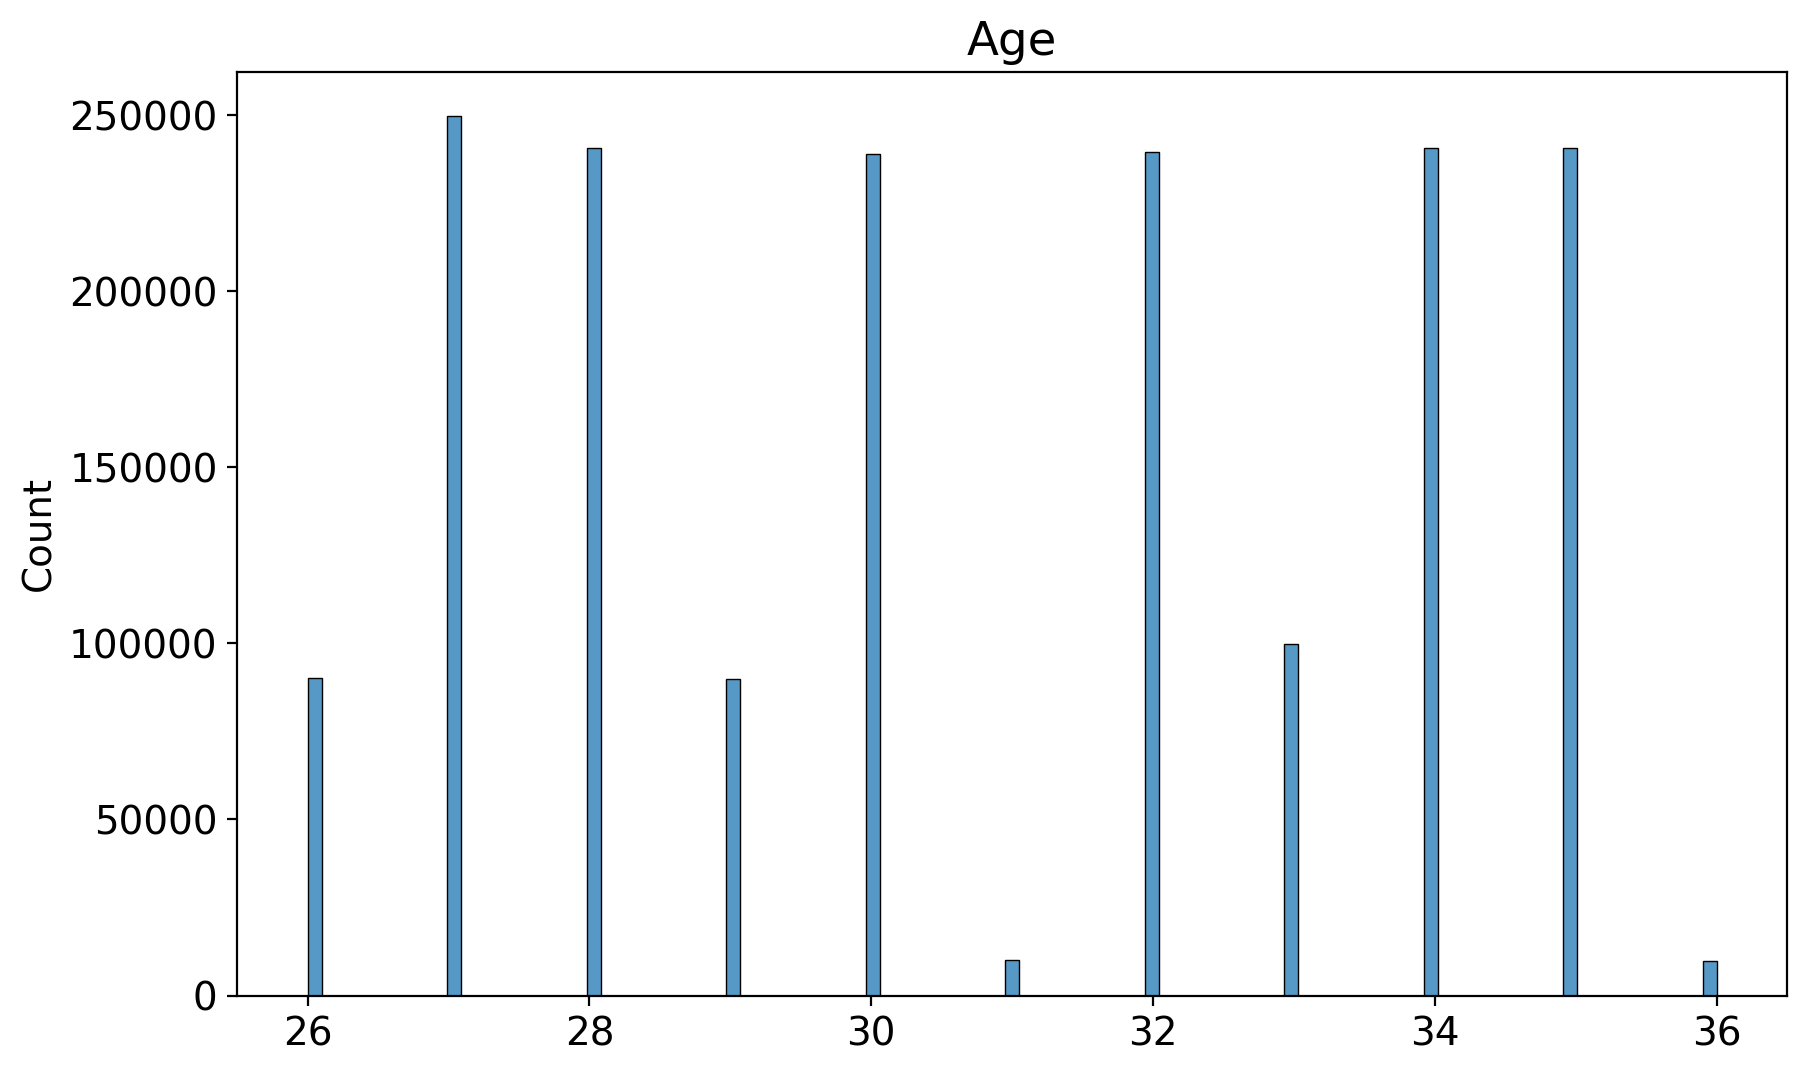

In [22]:
for feature in features:
    intervals(male, feature)

## Пункт №5

В пункте 2 можно было воспользоваться критерием Пирсона для оценки распределений.